In [1]:
# first step to import all libraries 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sns

In [2]:
FraudCheck = pd.read_csv("Fraud_check.csv")

In [3]:
FraudCheck.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
FraudCheck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
FraudCheck.shape

(600, 6)

In [6]:
FraudCheck.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
FraudCheck.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


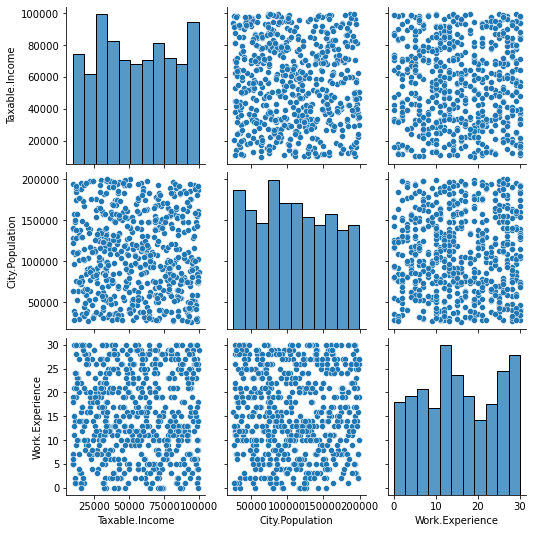

In [8]:
# plotting pair plot to visualise the attributes all at once
sns.pairplot(data=FraudCheck)

In [9]:
FraudCheck["Taxable.Income"].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [10]:
FraudCheck['taxable_status'] = pd.cut(FraudCheck['Taxable.Income'], bins=[-1, 30000, 100000], labels=['Risky', 'Good'])
FraudCheck

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [11]:
FraudCheck.rename(columns = {'Undergrad' : 'undergrad' , 'Marital.Status' : 'marital_status', 'City.Population': 'population',
                    'Work.Experience': 'work_exp','Urban' :'urban' , }, inplace= True)
FraudCheck

,undergrad,marital_status,Taxable.Income,Population,work_exp,urban,taxable_status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [12]:
FraudCheck.drop("Taxable.Income",axis=1,inplace=True)
FraudCheck

,undergrad,marital_status,Population,work_exp,urban,taxable_status
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
FraudCheck['undergrad'] = label_encoder.fit_transform(FraudCheck['undergrad'])
FraudCheck['marital_status'] = label_encoder.fit_transform(FraudCheck['marital_status'])
FraudCheck['urban'] = label_encoder.fit_transform(FraudCheck['urban'])
FraudCheck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   undergrad       600 non-null    int32   
 1   marital_status  600 non-null    int32   
 2   Population      600 non-null    int64   
 3   work_exp        600 non-null    int64   
 4   urban           600 non-null    int32   
 5   taxable_status  600 non-null    category
dtypes: category(1), int32(3), int64(2)
memory usage: 17.2 KB


In [21]:
x = FraudCheck.iloc[:,0:5]
y = FraudCheck['taxable_status']

In [22]:
x

,undergrad,marital_status,Population,work_exp,urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [23]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: taxable_status, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [33]:
y.value_counts()

Good     476
Risky    124
Name: taxable_status, dtype: int64

In [24]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=15)

### Building Decision Tree Classifier using gini Criteria

In [25]:
model = DecisionTreeClassifier(criterion="gini",min_samples_split=50,max_depth=7)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=50)

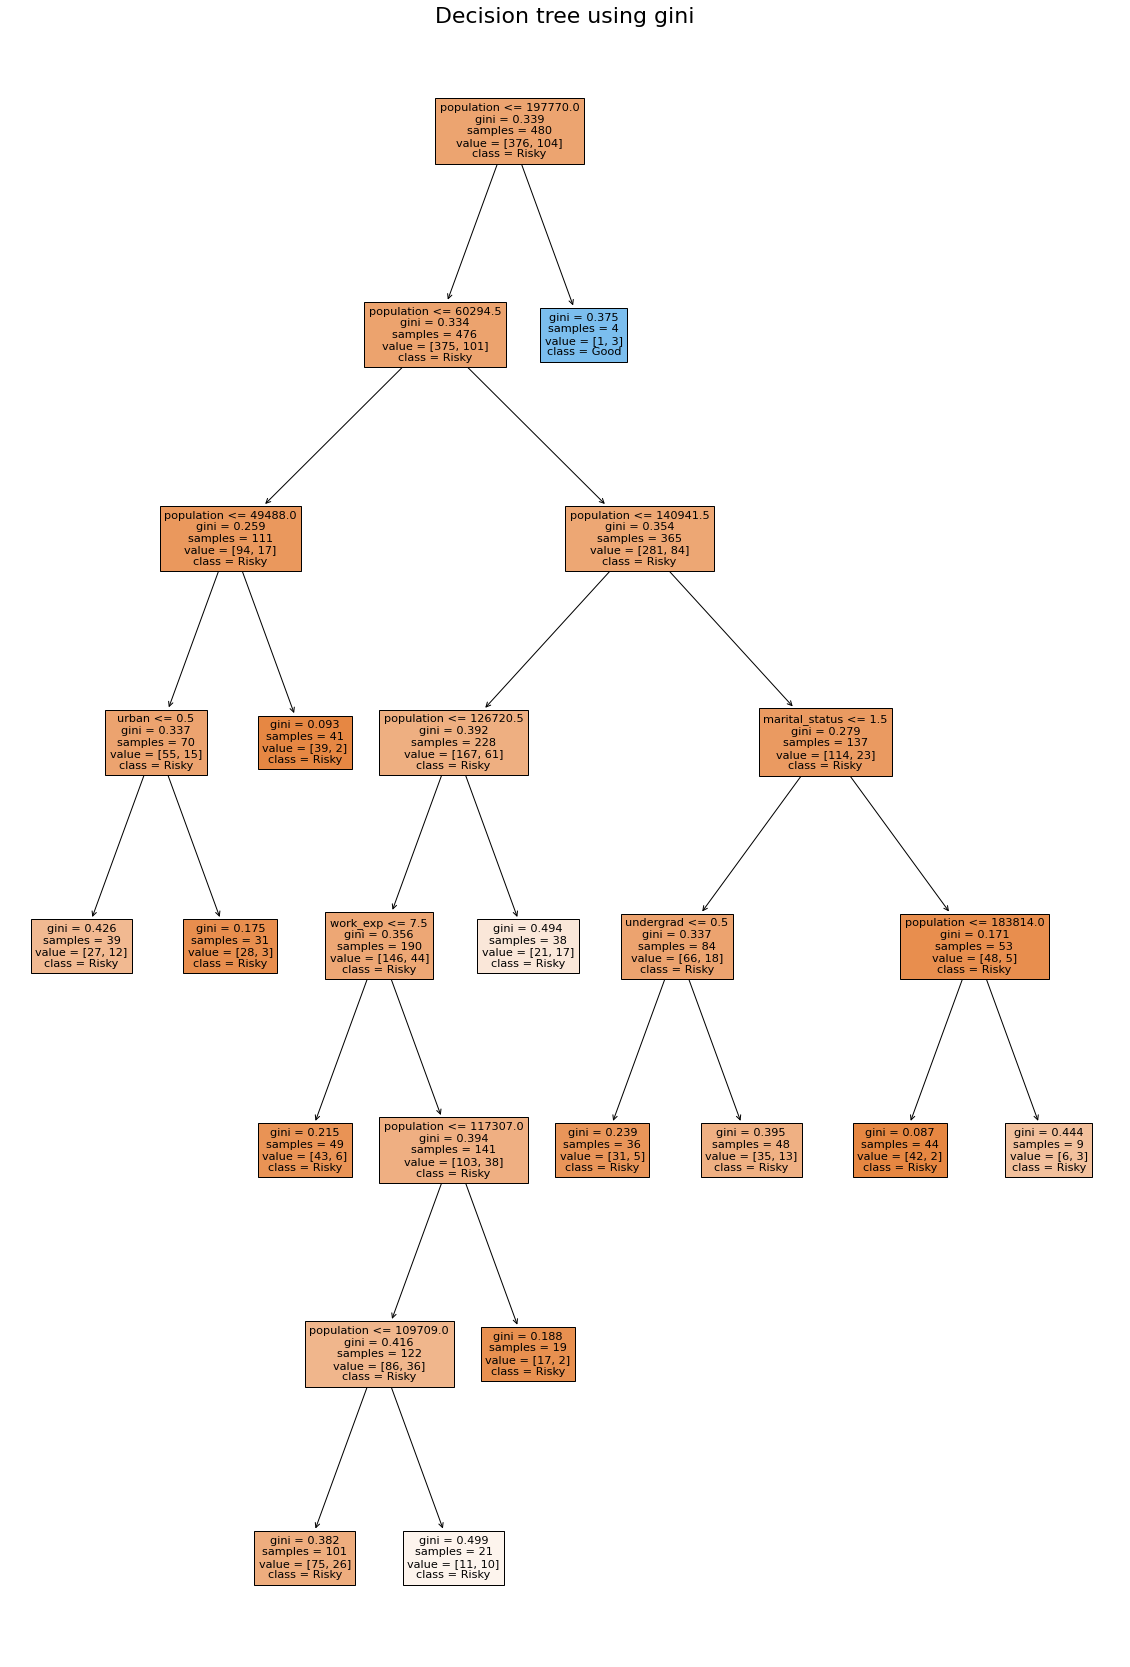

In [26]:
fig = plt.figure(figsize=(20,30))
fig = tree.plot_tree(model,
 feature_names= ['undergrad','marital_status','population','work_exp','urban'], class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using gini',fontsize=22)

plt.savefig('FraudCheck_DT_gini.pdf')
  

In [27]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Good     116
Risky      4
dtype: int64

In [28]:
from sklearn import metrics
metrics.accuracy_score(preds,y_test)

0.8

In [28]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

        high       0.62      0.55      0.58        38
         low       0.63      0.69      0.66        42

    accuracy                           0.62        80
   macro avg       0.62      0.62      0.62        80
weighted avg       0.62      0.62      0.62        80



# Building Decision Tree Classifier using Entropy Criteria¶


In [29]:
model = DecisionTreeClassifier(criterion="entropy",min_samples_split=50,max_depth=7)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=50)

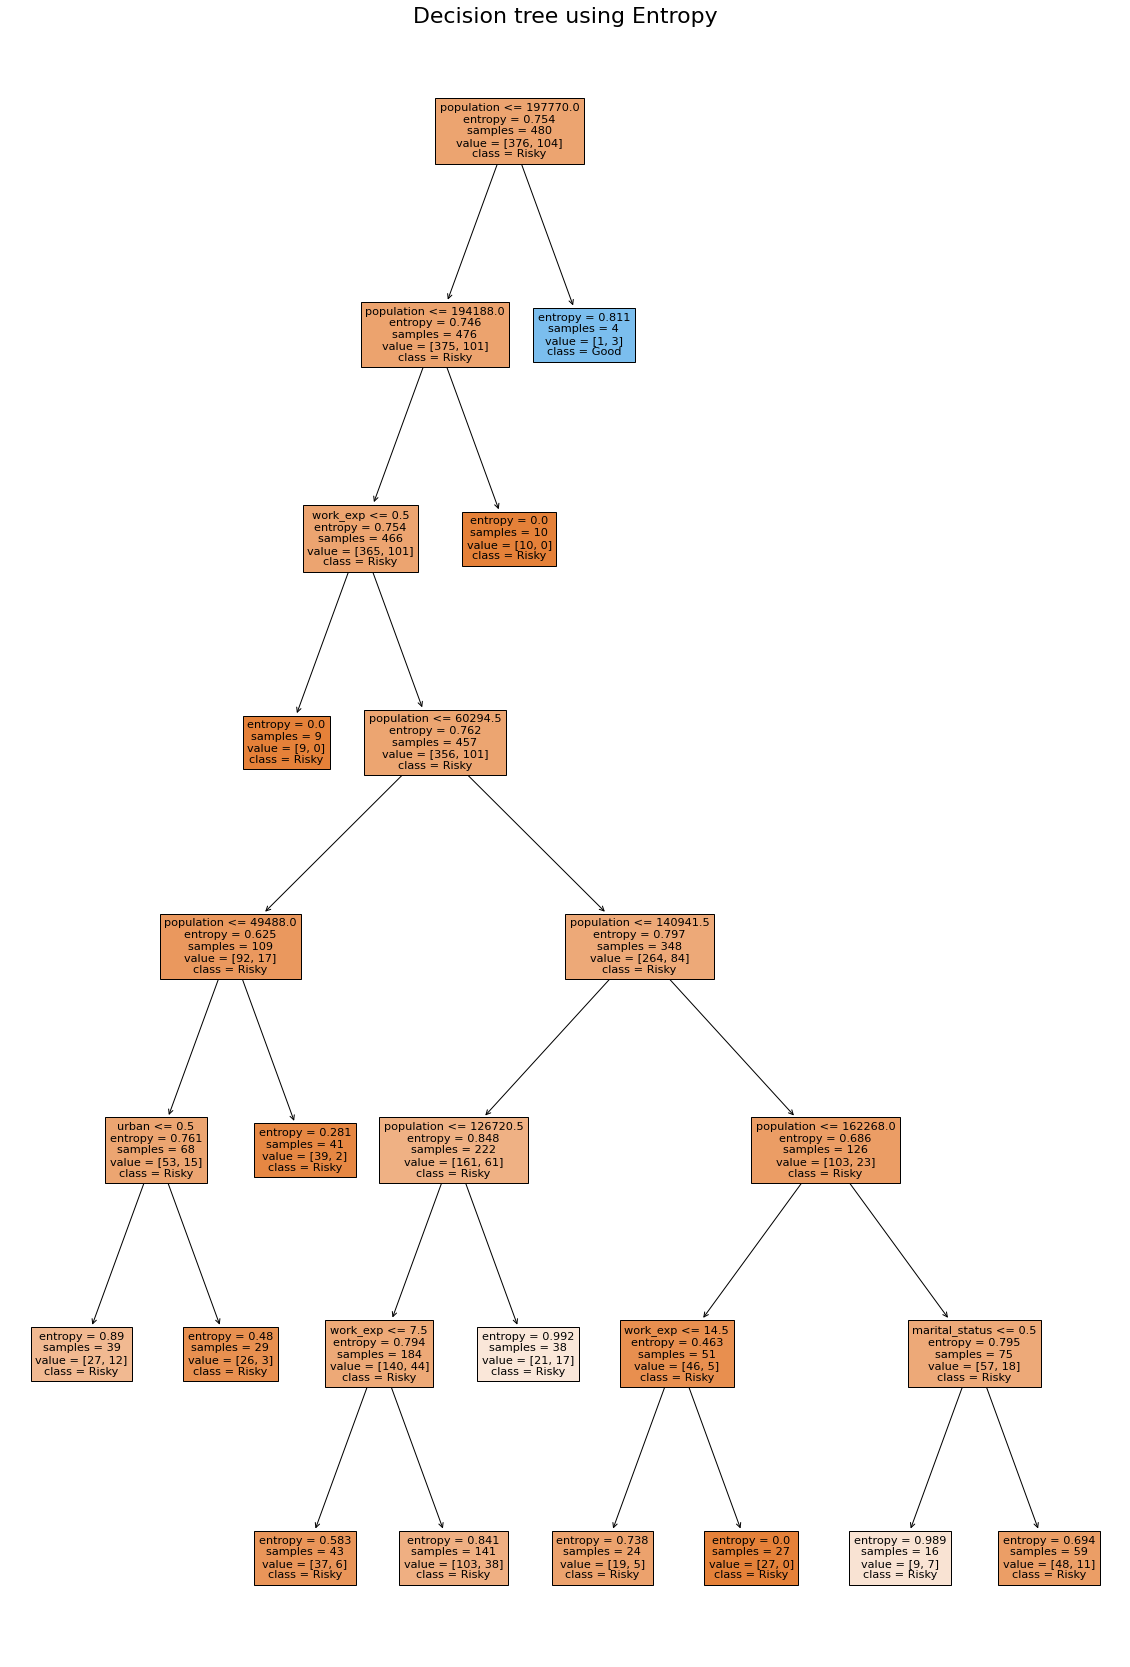

In [30]:
fig = plt.figure(figsize=(20,30))
fig = tree.plot_tree(model,
 feature_names= ['undergrad','marital_status','population','work_exp','urban'], class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)

plt.savefig('FraudCheck_DT_Entropy.pdf')
  

In [31]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Good     116
Risky      4
dtype: int64

In [32]:
from sklearn import metrics
metrics.accuracy_score(preds,y_test)

0.8